# 1:Business problem Understanding

In [1]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
df=pd.read_csv("C:\\Users\\Sarthak\\OneDrive\\Desktop\\CSV\\LoanData.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.drop('Loan_ID',axis=1,inplace=True)

### Separate the Continuous and Discrete Variable

In [5]:
dis=['Gender','Married','Dependents','Education',
     'Self_Employed','Credit_History','Property_Area',"Loan_Status",'Loan_Amount_Term']
con=['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [6]:
for name in dis:
    print(f"====================={name}===================")
    print(df[name].value_counts())

=====================Gender===================
Gender
Male      489
Female    112
Name: count, dtype: int64
=====================Married===================
Married
Yes    398
No     213
Name: count, dtype: int64
=====================Dependents===================
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
=====================Education===================
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
=====================Self_Employed===================
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
=====================Credit_History===================
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
=====================Property_Area===================
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
=====================Loan_Status===================
Loan_Status
Y    422
N    192
Name: count, dtype: int64
=====================Loan_Amount_Term==========

# EDA

### For Continous Data

In [7]:
df[con].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### Co-relation Between Continuous Columns

<Axes: >

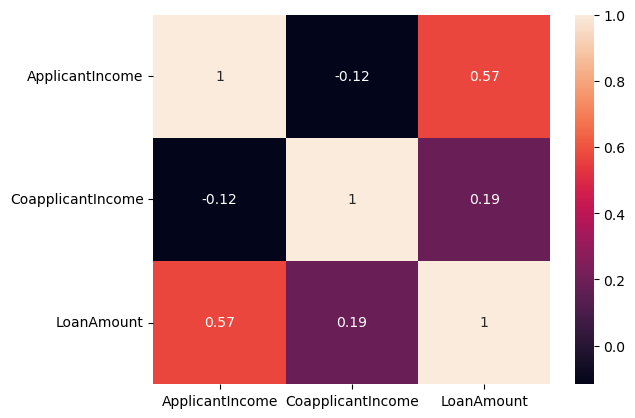

In [8]:
sns.heatmap(df[con].corr(),annot=True)

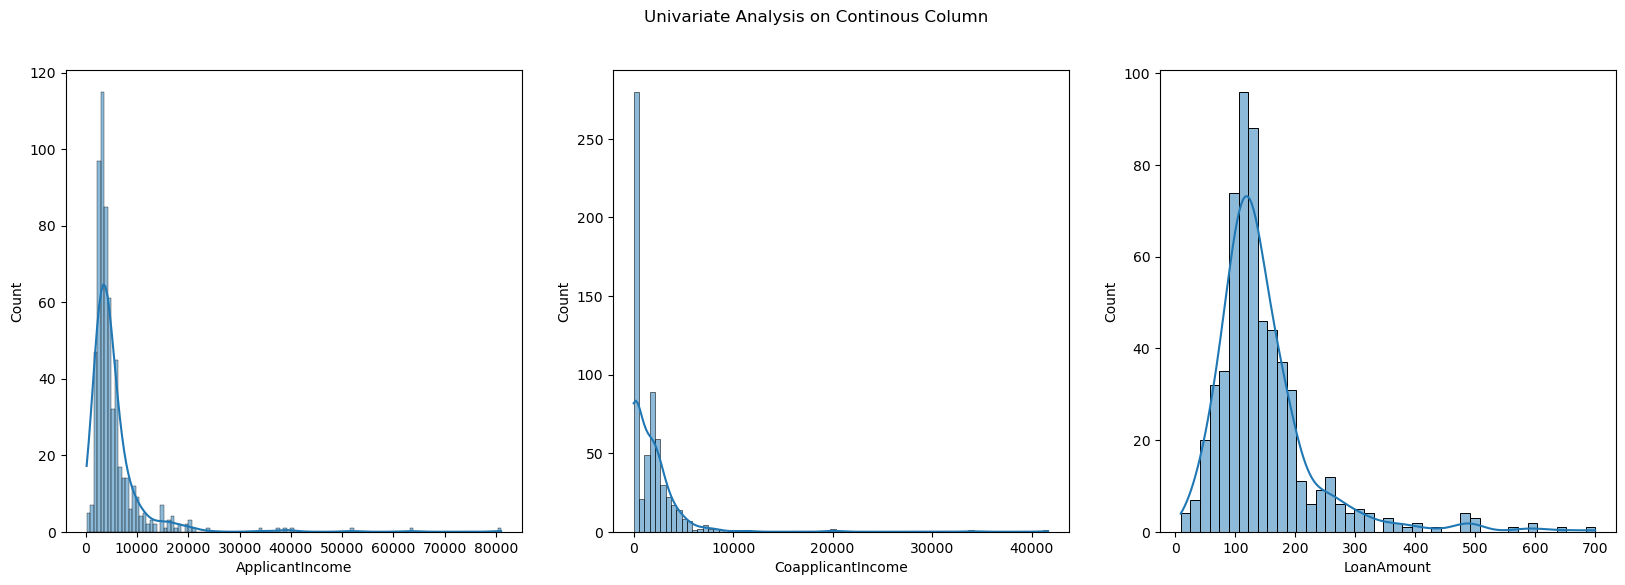

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.histplot(df['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(df['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(df["LoanAmount"],kde=True)

plt.suptitle("Univariate Analysis on Continous Column")
plt.show()

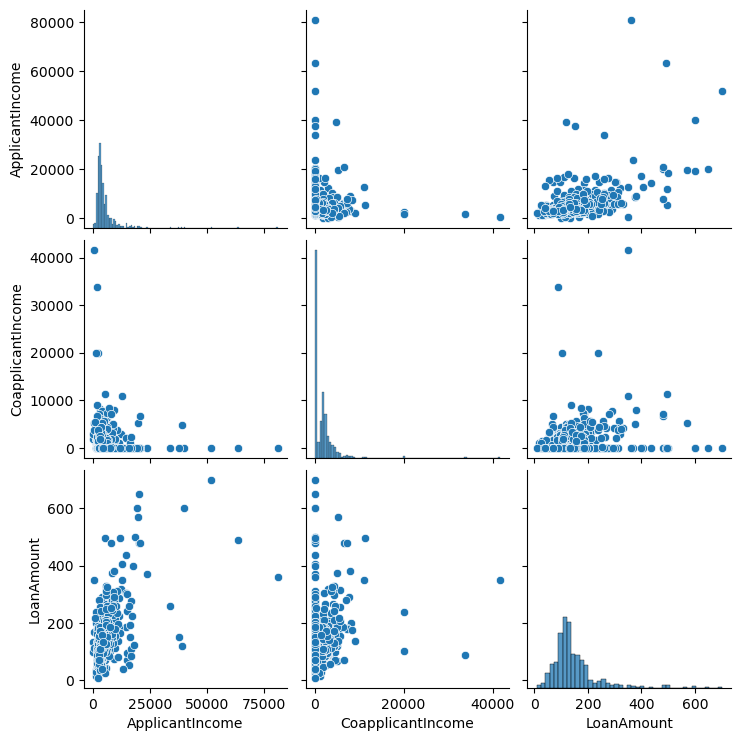

In [10]:
sns.pairplot(df[con])
plt.show()

### Checking for Outliers

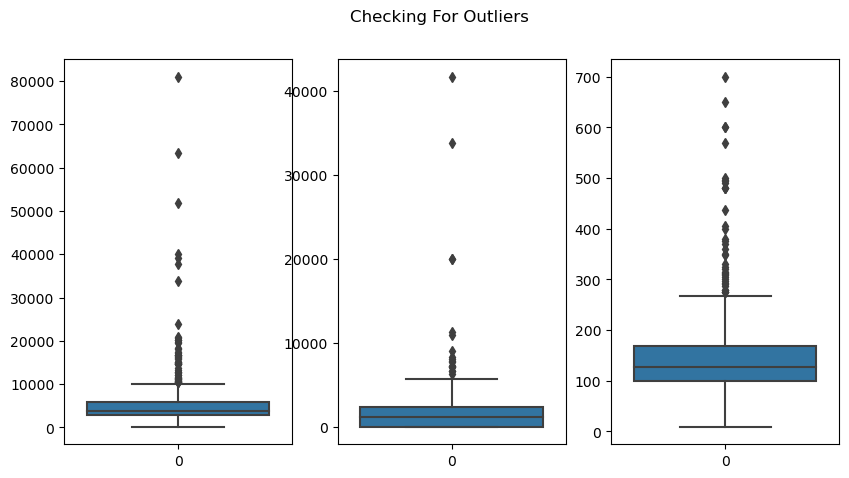

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.boxplot(df["ApplicantIncome"])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Checking For Outliers')
plt.show()

### For Discrete Variable

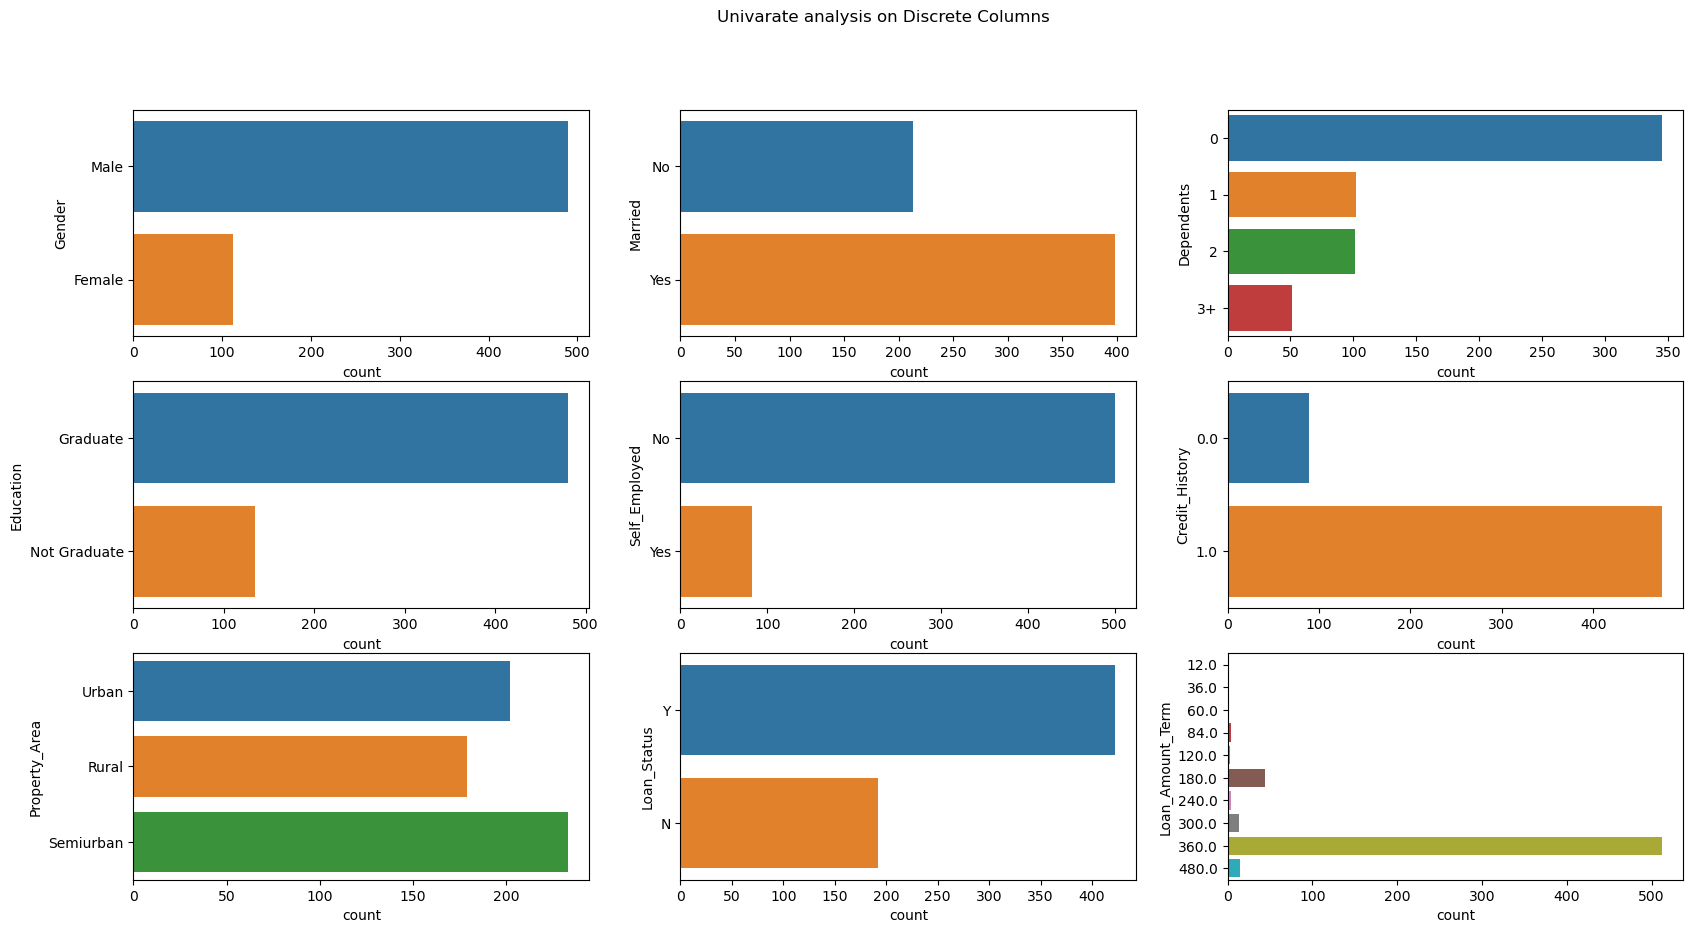

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.countplot(y=df['Gender'])

plt.subplot(3,3,2)
sns.countplot(y=df["Married"])

plt.subplot(3,3,3)
sns.countplot(y=df['Dependents'])

plt.subplot(3,3,4)
sns.countplot(y=df["Education"])

plt.subplot(3,3,5)
sns.countplot(y=df["Self_Employed"])

plt.subplot(3,3,6)
sns.countplot(y=df["Credit_History"])

plt.subplot(3,3,7)
sns.countplot(y=df["Property_Area"])

plt.subplot(3,3,8)
sns.countplot(y=df["Loan_Status"])

plt.subplot(3,3,9)
sns.countplot(y=df['Loan_Amount_Term'])

plt.suptitle("Univarate analysis on Discrete Columns")
plt.show()

# Data Preprocessing

# Data Cleaning

In [13]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.isna().sum()/len(df)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
df.dropna(subset=['LoanAmount','Loan_Amount_Term','Credit_History'],ignore_index=True,inplace=True) 
# For we Can not Know the Loan amount and Term

### Removing the Null value from Catagorical Data

In [16]:
for name in dis:
    df[name].fillna(df[name].mode()[0],inplace=True)

### Correction of Wrong Data

In [17]:
df['Dependents'].replace('3+',3,inplace=True)

In [18]:
df['Dependents']=df['Dependents'].astype('int')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')

### Creating new income Column By Adding Applicant income and Co-applicant income

In [19]:
df['Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [20]:
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

### Encoding

In [21]:
df['Gender']=df["Gender"].map({'Male':1,'Female':0}).astype('int')
df['Married']=df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype("int")
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

### Converting Loan_Amount_Term from months to years

In [22]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"]/12

### Normalization of Skewed Data

In [23]:
df[['LoanAmount','Income']].skew()

LoanAmount    2.607945
Income        5.777628
dtype: float64

In [24]:
from scipy.stats import boxcox
df['Income'],a=boxcox(df['Income'])

In [25]:
df['LoanAmount']=df['LoanAmount']**(1/11)

In [26]:
df[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.009156
dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            529 non-null    int32  
 1   Married           529 non-null    int32  
 2   Dependents        529 non-null    int32  
 3   Education         529 non-null    int32  
 4   Self_Employed     529 non-null    int32  
 5   LoanAmount        529 non-null    float64
 6   Loan_Amount_Term  529 non-null    float64
 7   Credit_History    529 non-null    float64
 8   Property_Area     529 non-null    int32  
 9   Loan_Status       529 non-null    int32  
 10  Income            529 non-null    float64
dtypes: float64(4), int32(7)
memory usage: 31.1 KB


# Separating the training and Testing Data and output

In [28]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

### Identify the best random state number

In [29]:
# HyperParameter Tunig for train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
train=[]
test=[]
cv=[]

for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    m=LogisticRegression()
    m.fit(X_train,y_train)
    train_pred=m.predict(X_train)
    test_pred=m.predict(X_test)
    train.append(accuracy_score(train_pred,y_train))
    test.append(accuracy_score(test_pred,y_test))
    cv.append(cross_val_score(m,X,y,cv=5,scoring="accuracy").mean())
em=pd.DataFrame({"Train":train,"Test":test,"CV":cv})
gm=em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
print("Best random state number:",gm[gm['Test']==gm['Test'].max()].index.to_list()[0])

Best random state number: 16


### train_test_split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=16)

# Modeling & Evaluation

### 1.LogisticRegression

In [31]:
# Modeling
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

# Prediction
train_pred=log.predict(X_train)
test_pred=log.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,train_pred))
print("Test Accuracy:",accuracy_score(y_test,test_pred))
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(log,X,y,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.806146572104019
Test Accuracy: 0.8490566037735849
Cross Validation Score: 0.8148068283917341


### 2.KNN

In [32]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,50))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

grid.fit(X_train,y_train)
knn=grid.best_estimator_

#Prediction
train_pred=knn.predict(X_train)
test_pred=knn.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,train_pred))
print("Test Accuracy:",accuracy_score(y_test,test_pred))

from sklearn.model_selection import cross_val_score
print("Cross Validation Accuracy:",cross_val_score(knn,X,y,cv=5).mean())

Train Accuracy: 0.7588652482269503
Test Accuracy: 0.8113207547169812
Cross Validation Accuracy: 0.7561185983827494


### 3.SVM

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

estimator=SVC()
param_grid={"C":[0.1,0.2,0.3,1],"kernel":['linear','sigmoid','rbf','ploy']}
grid=GridSearchCV(estimator,param_grid)
grid.fit(X_train,y_train)
svm=grid.best_estimator_

# Predict
train_pred=svm.predict(X_train)
test_pred=svm.predict(X_test)

# Evaluation
print("Train Accuracy",accuracy_score(y_train,train_pred))
print("Test Accuracy",accuracy_score(y_test,test_pred))
print("Cross Vlidation Score",cross_val_score(svm,X,y,cv=5).mean())

Train Accuracy 0.806146572104019
Test Accuracy 0.8490566037735849
Cross Vlidation Score 0.8148068283917341


### 4.Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier(random_state=0)
param_grid={"criterion":['gini','entropy'],'max_depth':list(range(1,16))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

#Identifying the best HyperParameter and Feature Importance
dt=grid.best_estimator_

# enumerate() is used to get the index and value of a iterable object
imp_lst=[i for i,x in enumerate(dt.feature_importances_) if x>0]

# Creating new X train and X test based on new feature importances
X_train_dt=X_train.iloc[:,imp_lst]
X_test_dt=X_test.iloc[:,imp_lst]
X_new_dt=X.iloc[:,imp_lst]
# Train the model with best important features
dt.fit(X_train_dt,y_train)

# Prediction
train_pred=dt.predict(X_train_dt)
test_pred=dt.predict(X_test_dt)

# Evaluation
print("Train Accuracy:",accuracy_score(y_train,train_pred))
print("Test Accuracy:",accuracy_score(y_test,test_pred))
print("Cross Validation Score:",cross_val_score(dt,X_new_dt,y,cv=5).mean())

Train Accuracy: 0.806146572104019
Test Accuracy: 0.8490566037735849
Cross Validation Score: 0.8148068283917341


### 5.Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=0)
param_grid={'n_estimators':list(range(1,20)),'max_depth':list(range(1,20))}

grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

# Identifying the best parameter and feature importances
rf=grid.best_estimator_
imp_lst=[i for i,x in enumerate(rf.feature_importances_) if x>0] # no need to drop any columns

# Prediction
train_pred=rf.predict(X_train)
test_pred=rf.predict(X_test)

# Evaluation
print("Train Accuracy:",accuracy_score(y_train,train_pred))
print("Test Accuracy:",accuracy_score(y_test,test_pred))
print("Cross Validation Score:",cross_val_score(rf,X,y,cv=5).mean())

Train Accuracy: 0.8368794326241135
Test Accuracy: 0.8301886792452831
Cross Validation Score: 0.80911051212938


### 6.AdaBoost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier()
param_grid={'n_estimators':list(range(1,50))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

# Identify the best prameter and Feature Importance
ada=grid.best_estimator_
imp_lst=[i for i,x in enumerate(ada.feature_importances_) if x>0]

# Creating new train and test using Feature importance
X_train_ada=X_train.iloc[:,imp_lst]
X_test_ada=X_test.iloc[:,imp_lst]
X_new_ada=X.iloc[:,imp_lst]

# Train The model With new data
ada.fit(X_train_ada,y_train)

# Prediction
train_pred=ada.predict(X_train_ada)
test_pred=ada.predict(X_test_ada)

# Evaluation
print("Train Accuracy:",accuracy_score(y_train,train_pred))
print("Test Accuracy:",accuracy_score(y_test,test_pred))
print("Cross Validation Score:",cross_val_score(ada,X_new_ada,y,cv=5).mean())

Train Accuracy: 0.8297872340425532
Test Accuracy: 0.8301886792452831
Cross Validation Score: 0.7996765498652292


### 7.Gradiant Boost Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier()
param_grid={'n_estimators':list(range(1,20)),'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)

# Identifying the best parameter and feature importances
gb=grid.best_estimator_
imp_lst=[i for i,x in enumerate(gb.feature_importances_) if x>0 ] # No need for droping anty column

# Predict
train_pred= gb.predict(X_train)
test_pred=gb.predict(X_test)

# Evaluation
print("Train Accuracy:",accuracy_score(y_train,train_pred))
print("Test Accuracy:",accuracy_score(y_test,test_pred))
print("Cross Validation Score:",cross_val_score(gb,X,y,cv=5).mean())

Train Accuracy: 0.8534278959810875
Test Accuracy: 0.839622641509434
Cross Validation Score: 0.8053548966756514


### 8.XG Boost Classifier

In [39]:
from xgboost import XGBClassifier
estimator=XGBClassifier()
param_grid={'n_estimators':list(range(1,10)),'max_depth':[2,3,4,5,6,7,8,9,10],
            'gamma':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
grid.fit(X_train,y_train)

# Identifying the best parameter and feature importances
xgb=grid.best_estimator_
imp_lst=[i for i,x in enumerate(xgb.feature_importances_) if x>0] # No need for drop any data

# Prediction
train_pred=xgb.predict(X_train)
test_pred=xgb.predict(X_test)

# Evaluation
print("Train Accuracy:",accuracy_score(y_train,train_pred))
print("Test Accuracy:",accuracy_score(y_test,test_pred))
print("Cross Validation Score:",cross_val_score(xgb,X,y,cv=5).mean())

Train Accuracy: 0.8416075650118203
Test Accuracy: 0.8301886792452831
Cross Validation Score: 0.8129200359389038
